# League of legends winner predicition

## Import the necessary libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## EDA

### Data understanding

In [4]:
# Import the data
df = pd.read_csv('./Challenger_Ranked_Games.csv')

print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:", df.dtypes)

Dataset Shape: (26904, 50)

Columns: ['gameId', 'gameDuration', 'blueWins', 'blueFirstBlood', 'blueFirstTower', 'blueFirstBaron', 'blueFirstDragon', 'blueFirstInhibitor', 'blueDragonKills', 'blueBaronKills', 'blueTowerKills', 'blueInhibitorKills', 'blueWardPlaced', 'blueWardkills', 'blueKills', 'blueDeath', 'blueAssist', 'blueChampionDamageDealt', 'blueTotalGold', 'blueTotalMinionKills', 'blueTotalLevel', 'blueAvgLevel', 'blueJungleMinionKills', 'blueKillingSpree', 'blueTotalHeal', 'blueObjectDamageDealt', 'redWins', 'redFirstBlood', 'redFirstTower', 'redFirstBaron', 'redFirstDragon', 'redFirstInhibitor', 'redDragonKills', 'redBaronKills', 'redTowerKills', 'redInhibitorKills', 'redWardPlaced', 'redWardkills', 'redKills', 'redDeath', 'redAssist', 'redChampionDamageDealt', 'redTotalGold', 'redTotalMinionKills', 'redTotalLevel', 'redAvgLevel', 'redJungleMinionKills', 'redKillingSpree', 'redTotalHeal', 'redObjectDamageDealt']

Data Types: gameId                       int64
gameDuration    

* This data contains key information that can affect the win or loss in the game.

* League of Legends includes objects, champions, and minions.

* Objects here represent dragons, barons, messengers, towers, suppressors, and more.

* The heart of the data is the result of the match between the blue and red teams.

* Therefore, the factor analysis that affects the win or loss of the game and the methodology to predict the win or loss of the game will be the most important points in analyzing the data.

### Data Quality Assesment

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("Missing Values:")
print(missing_values)
print("\nMissing Percentage:")
print(missing_percentage)

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicates: {duplicates}")

# Check for outliers in numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

Missing Values:
gameId                     0
gameDuration               0
blueWins                   0
blueFirstBlood             0
blueFirstTower             0
blueFirstBaron             0
blueFirstDragon            0
blueFirstInhibitor         0
blueDragonKills            0
blueBaronKills             0
blueTowerKills             0
blueInhibitorKills         0
blueWardPlaced             0
blueWardkills              0
blueKills                  0
blueDeath                  0
blueAssist                 0
blueChampionDamageDealt    0
blueTotalGold              0
blueTotalMinionKills       0
blueTotalLevel             0
blueAvgLevel               0
blueJungleMinionKills      0
blueKillingSpree           0
blueTotalHeal              0
blueObjectDamageDealt      0
redWins                    0
redFirstBlood              0
redFirstTower              0
redFirstBaron              0
redFirstDragon             0
redFirstInhibitor          0
redDragonKills             0
redBaronKills              

### Target Variable Analysis

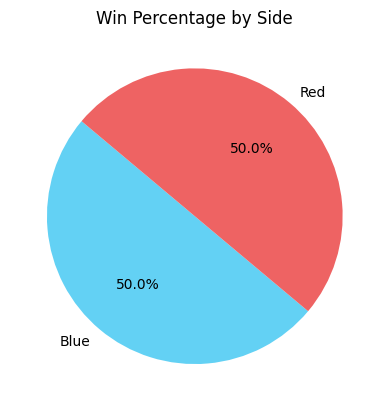

In [6]:
labels = ['Blue', 'Red']
sizes = [df['blueWins'].mean(),  df['redWins'].mean()]
colors = ['#63D1F4', '#EE6363']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        colors=colors, startangle=140)
plt.title("Win Percentage by Side")
plt.show()

### Game Duration Analysis

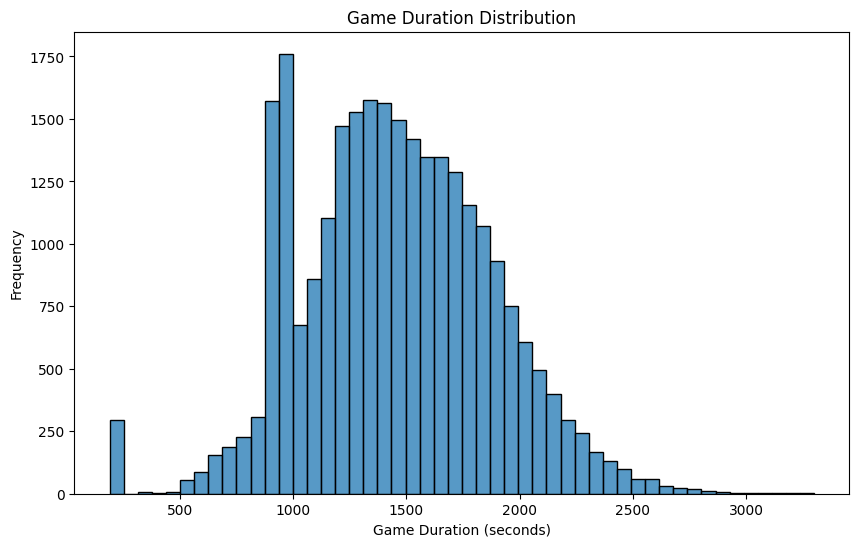

Average Game Duration by Winner: blueWins
0    1449.251450
1    1448.056043
Name: gameDuration, dtype: float64


In [7]:
# Analyze game duration patterns
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='gameDuration', bins=50)
plt.title('Game Duration Distribution')
plt.xlabel('Game Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

# Calculate average game duration by winner
duration_by_winner = df.groupby('blueWins')['gameDuration'].mean()
print(f"Average Game Duration by Winner: {duration_by_winner}")

### Team performance metrics analysis

C:\Users\MohamedOsama\AppData\Local\Temp\ipykernel_9000\635199051.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(['Blue Team', 'Red Team'])
C:\Users\MohamedOsama\AppData\Local\Temp\ipykernel_9000\635199051.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(['Blue Team', 'Red Team'])
C:\Users\MohamedOsama\AppData\Local\Temp\ipykernel_9000\635199051.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 2].set_xticklabels(['Blue Team', 'Red Team'])
C:\Users\MohamedOsama\AppData\Local\Temp\ipykernel_9000\635199051.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels

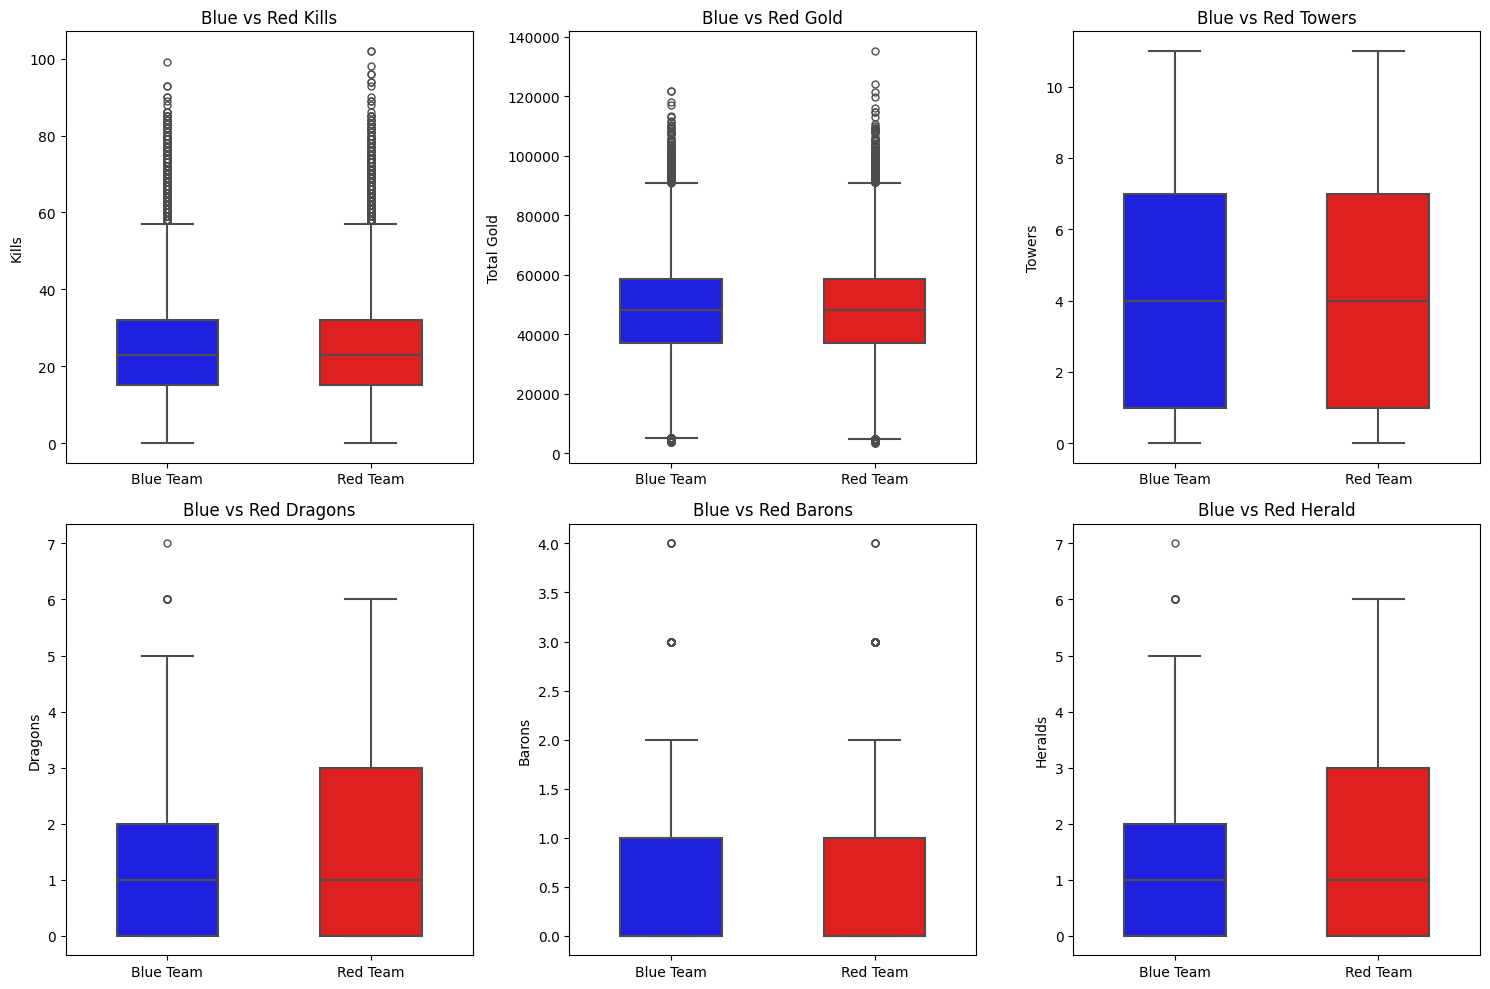

In [8]:
# Create box plots for team comparisons
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot blue vs red kills
sns.boxplot(data=df[['blueKills', 'redKills']], 
            palette=['#0000ff', '#ff0000'],
            width=0.5,
            fliersize=5,
            linewidth=1.5,
            ax=axes[0, 0])
axes[0, 0].set_title('Blue vs Red Kills')
axes[0, 0].set_ylabel('Kills')
axes[0, 0].set_xticklabels(['Blue Team', 'Red Team'])

# Plot blue vs red gold
sns.boxplot(data=df[['blueTotalGold', 'redTotalGold']], 
            palette=['#0000ff', '#ff0000'],
            width=0.5,
            fliersize=5,
            linewidth=1.5,
            ax=axes[0, 1])
axes[0, 1].set_title('Blue vs Red Gold')
axes[0, 1].set_ylabel('Total Gold')
axes[0, 1].set_xticklabels(['Blue Team', 'Red Team'])

# Plot blue vs red towers
sns.boxplot(data=df[['blueTowerKills', 'redTowerKills']], 
            palette=['#0000ff', '#ff0000'],
            width=0.5,
            fliersize=5,
            linewidth=1.5,
            ax=axes[0, 2])
axes[0, 2].set_title('Blue vs Red Towers')
axes[0, 2].set_ylabel('Towers')
axes[0, 2].set_xticklabels(['Blue Team', 'Red Team'])

# Plot blue vs red dragons
sns.boxplot(data=df[['blueDragonKills', 'redDragonKills']], 
            palette=['#0000ff', '#ff0000'],
            width=0.5,
            fliersize=5,
            linewidth=1.5,
            ax=axes[1, 0])
axes[1, 0].set_title('Blue vs Red Dragons')
axes[1, 0].set_ylabel('Dragons')
axes[1, 0].set_xticklabels(['Blue Team', 'Red Team'])

# Plot blue vs red barons kills
sns.boxplot(data=df[['blueBaronKills', 'redBaronKills']], 
            palette=['#0000ff', '#ff0000'],
            width=0.5,
            fliersize=5,
            linewidth=1.5,
            ax=axes[1, 1])
axes[1, 1].set_title('Blue vs Red Barons')
axes[1, 1].set_ylabel('Barons')
axes[1, 1].set_xticklabels(['Blue Team', 'Red Team'])

# Plot blue vs red dragons kills
sns.boxplot(data=df[['blueDragonKills', 'redDragonKills']], 
            palette=['#0000ff', '#ff0000'],
            width=0.5,
            fliersize=5,
            linewidth=1.5,
            ax=axes[1, 2])
axes[1, 2].set_title('Blue vs Red Herald')
axes[1, 2].set_ylabel('Heralds') 
axes[1, 2].set_xticklabels(['Blue Team', 'Red Team'])

plt.tight_layout()
plt.show()

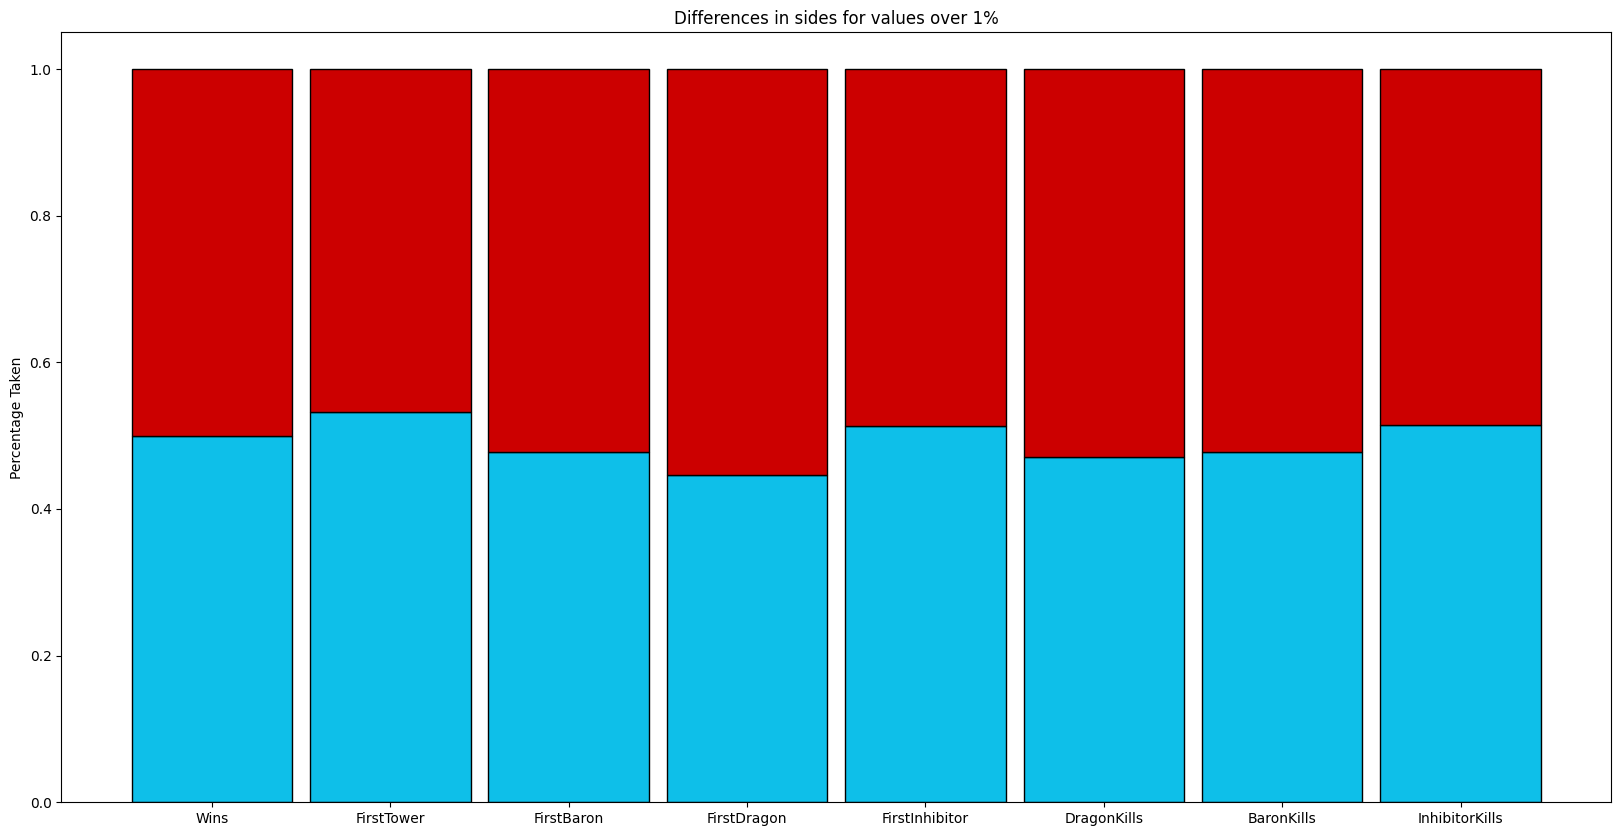

In [9]:
# Categories that are more important
categories = ['Wins', 'FirstBlood', 'FirstTower',
       'FirstBaron', 'FirstDragon', 'FirstInhibitor',
       'DragonKills', 'BaronKills', 'TowerKills',
       'InhibitorKills', 'WardPlaced', 'Wardkills', 'Kills',
       'Death', 'Assist', 'ChampionDamageDealt', 'TotalGold',
       'TotalMinionKills', 'TotalLevel', 'AvgLevel',
       'JungleMinionKills', 'KillingSpree', 'TotalHeal',
       'ObjectDamageDealt']


# Calculate the percentage of each category for each side
blue_percentage_data = {}

for category in categories:
    blue_total = df['blue'+category].sum()
    red_total = df['red'+category].sum()
    total = (blue_total + red_total).sum()
    
    blue_percent = blue_total/total
    red_percent = red_total/total
    
    blue_percentage_data[category] = blue_percent

# Calculate the percentage of each category for each side

# Decide which categories are more important
blue_over = {k:v for k,v in blue_percentage_data.items() if (abs(v-0.5)>0.01) or k=="Wins"}
red_over = {k:1-v for k,v in blue_over.items()}

y = range(len(blue_over))
plt.figure(figsize=(20,10))
barWidth = 0.9

# blue
plt.bar(y, list(blue_over.values()), color='#0EBFE9', edgecolor='black', width=barWidth)
# red
plt.bar(y, list(red_over.values()), bottom=list(blue_over.values()), color='#cc0000', edgecolor='black', width=barWidth)

# Custom x axis
plt.xticks(y, blue_over.keys())
plt.ylabel("Percentage Taken")
plt.title("Differences in sides for values over 1%")

# Show graphic
plt.show()


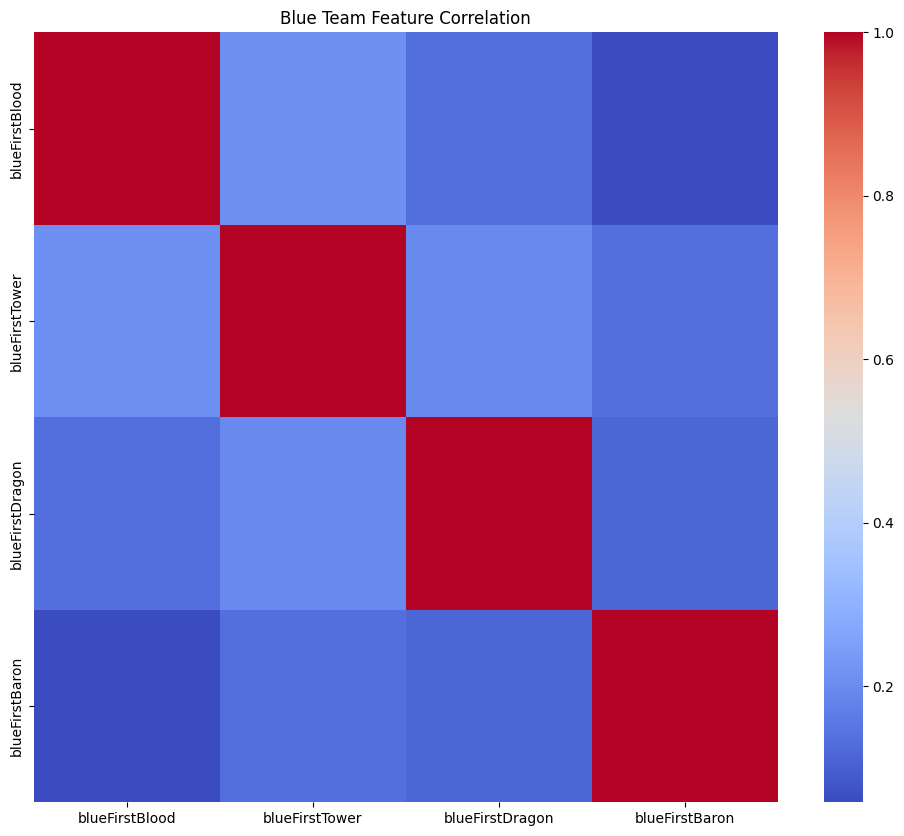

In [10]:
# Correlation matrix for blue team
blue_cols = [col for col in df.columns if 'blue' in col]
objectives = ['blueFirstBlood', 'blueFirstTower', 'blueFirstDragon', 'blueFirstBaron']
blue_corr = df[objectives].corr()

plt.figure(figsize=(12,10))
sns.heatmap(blue_corr, annot=False, cmap='coolwarm')
plt.title("Blue Team Feature Correlation")
plt.show()


In [29]:
# Separate winning and losing stats
win_stats =df.loc[df["blueWins"] == 1]
loss_stats =df.loc[df["blueWins"] == 0]
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Disable line wrapping
pd.set_option('display.max_colwidth', None)

In [30]:
win_stats_sum = win_stats.sum()
loss_stats_sum = loss_stats.sum()

In [31]:
print("Sum of each column in win_stats:")
print(win_stats_sum)



Sum of each column in win_stats:
gameId                     5.612369e+13
gameDuration               1.948215e+07
blueWins                   1.345400e+04
blueFirstBlood             8.163000e+03
blueFirstTower             1.008800e+04
blueFirstBaron             5.403000e+03
blueFirstDragon            7.236000e+03
blueFirstInhibitor         9.073000e+03
blueDragonKills            2.652400e+04
blueBaronKills             6.696000e+03
blueTowerKills             9.087600e+04
blueInhibitorKills         1.506200e+04
blueWardPlaced             8.047800e+05
blueWardkills              3.151280e+05
blueKills                  4.044740e+05
blueDeath                  2.481660e+05
blueAssist                 6.773040e+05
blueChampionDamageDealt    1.025049e+09
blueTotalGold              7.056260e+08
blueTotalMinionKills       7.188744e+06
blueTotalLevel             9.176110e+05
blueAvgLevel               1.835222e+05
blueJungleMinionKills      1.924149e+06
blueKillingSpree           9.448400e+04
blueTot

In [32]:
print("\nSum of each column in loss_stats:")
print(loss_stats_sum)


Sum of each column in loss_stats:
gameId                     5.611784e+13
gameDuration               1.949243e+07
blueWins                   0.000000e+00
blueFirstBlood             5.384000e+03
blueFirstTower             4.053000e+03
blueFirstBaron             1.164000e+03
blueFirstDragon            3.696000e+03
blueFirstInhibitor         8.040000e+02
blueDragonKills            1.086500e+04
blueBaronKills             1.564000e+03
blueTowerKills             2.743600e+04
blueInhibitorKills         1.615000e+03
blueWardPlaced             7.728800e+05
blueWardkills              2.856420e+05
blueKills                  2.463180e+05
blueDeath                  4.023880e+05
blueAssist                 3.984900e+05
blueChampionDamageDealt    8.514071e+08
blueTotalGold              5.903163e+08
blueTotalMinionKills       6.813351e+06
blueTotalLevel             8.318010e+05
blueAvgLevel               1.663602e+05
blueJungleMinionKills      1.562258e+06
blueKillingSpree           5.494600e+04
blueT

### **Towers:**

- **First Tower Destroyed:**
  - In **win games**, the blue team destroyed the first tower **1.2 times more** often than in **loss games**.
  - The **red team** also destroyed the first tower more often in loss games, with a higher number than in the win games.
  
- **Total Towers Destroyed:**
  - In **win games**, the blue team destroyed **3.3 times more** towers than in **loss games**.
  - The **red team** destroyed more towers in **loss games**.

---

### **Inhibitors:**

- **First Inhibitor Destroyed:**
  - In **win games**, the blue team destroyed the first inhibitor **11.3 times more** often than in **loss games**.

- **Total Inhibitors Destroyed:**
  - In **win games**, the blue team destroyed **9.3 times more** inhibitors than in **loss games**.

---

### **Dragons and Barons:**

- **First Dragon:**
  - In **win games**, the blue team prioritized the first dragon **2.0 times more** than in **loss games**.

- **Total Dragons Killed:**
  - In **win games**, the blue team killed **7.2 times more** dragons than in **loss games**.

- **First Baron:**
  - In **win games**, the blue team prioritized the first baron **4.6 times more** than in **loss games**.

- **Total Barons Killed:**
  - In **win games**, the blue team killed **4.3 times more** barons than in **loss games**.

---

### **Kills/Deaths:**

- **First Blood:**
  - The blue team secured first blood **1.5 times more** often in **win games** than in **loss games**.

- **Total Kills:**
  - In **win games**, the blue team got **1.6 times more** kills than in **loss games**.

- **Total Deaths:**
  - In **win games**, the blue team had **0.6 times fewer** deaths compared to **loss games**.

---

### **Micro/Miscellaneous:**

- **Wards Placed:**
  - In **win games**, the blue team placed **1.04 times more** wards than in **loss games**.

- **Wards Destroyed:**
  - In **win games**, the blue team destroyed **1.1 times more** wards than in **loss games**.

- **Gold:**
  - There was a **~20% higher gold** for the blue team in **win games** compared to **loss games**.

- **Creep Score (CS):**
  - The blue team had **~5.5% higher CS** in **win games** than in **loss games**.

- **Total Damage Dealt:**
  - The blue team dealt **~1.2% more** damage in **win games** than in **loss games**.

---
